Scanning L = 1.0 m
Scanning L = 2.0 m
Scanning L = 3.0 m
Scanning L = 4.0 m


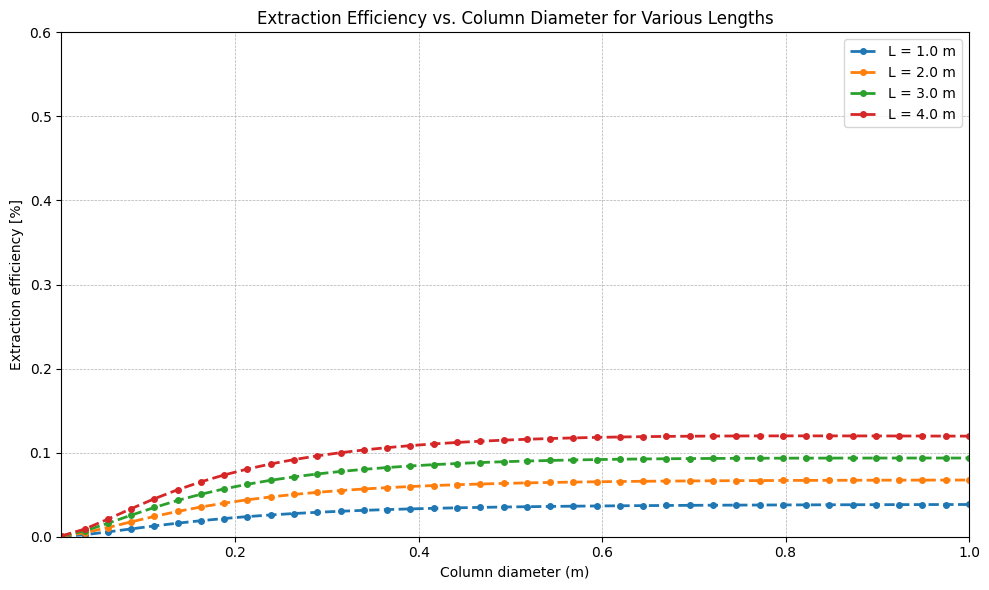

In [12]:
"""
Parametric scanner for the Bubble Column Gas-Liquid Contactor Model.

This script runs the bubble column simulation over a range of column
diameters and lengths to study their effect on extraction efficiency.
"""

import numpy as np
import matplotlib.pyplot as plt
import bubble_col_glc


def run_scan(diameters, lengths, base_params):
    """
    Runs the simulation across a grid of diameters and lengths.

    Args:
        diameters (np.array): Array of column diameters to scan.
        lengths (list): List of column lengths to scan.
        base_params (dict): Dictionary of fixed parameters for the simulation.

    Returns:
        dict: A dictionary where keys are lengths and values are numpy arrays
              of extraction efficiencies corresponding to the diameters.
    """
    scan_results = {}
    for L in lengths:
        efficiencies = []
        print(f"Scanning L = {L} m")
        for D in diameters:
            params = base_params.copy()
            params.update({"L": L, "D": D})
            try:
                # The solve function now returns a single dictionary
                [results, solution] = bubble_col_glc.solve(params)
                eff = results.get("extraction_efficiency [fraction]", np.nan)
            except Exception as e:
                print(f"  solve failed for D={D:.3f} L={L:.2f}: {e}")
                eff = np.nan
            efficiencies.append(eff)
        scan_results[L] = np.array(efficiencies)
    return scan_results


def plot_results(diameters, scan_results, out_file="extraction_vs_diameter.png"):
    """Plots the results of the parametric scan."""
    plt.figure(figsize=(10, 6))
    for L, efficiencies in scan_results.items():
        plt.plot(diameters, efficiencies, label=f"L = {L} m", lw=2, marker='o', markersize=4, linestyle='--')
    plt.xlabel("Column diameter (m)")
    plt.ylabel("Extraction efficiency [%]")
    plt.title("Extraction Efficiency vs. Column Diameter for Various Lengths")
    plt.ylim(0, 0.6)
    plt.xlim(diameters.min(), diameters.max())
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()

    plt.show()


# Base parameters (modify as required)
base_params = {
    "c_T_inlet": 1.96e-2,   # mol/m^3
    "y_T2_in": 0.0,
    "P_0": 5e5,
    "BCs": "C-C",           # Boundary conditions: "O-C" or "C-C"
    "Flow_l": 560,         # kg/s
    "Flow_g": 0.19,        # mol/s
    "T": 623,
    "elements": 50,        # Number of initial mesh elements for solver
}

# Define the parameter space for the scan
diameters = np.linspace(0.01, 1.0, 40)  # m
lengths = [1.0, 2.0, 3.0, 4.0]    # m

scan_results = run_scan(diameters, lengths, base_params)
plot_results(diameters, scan_results)